In [13]:
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

In [20]:
def usl (u, lmda, sigma, kappa):
    return (lmda * u) / (1 + sigma*(u-1) * kappa*u*(u-1))

In [8]:
raw_data = pd.read_csv('companies_dataset_nounits.csv')
print(raw_data.head())

# let's first separate the companies from each other
companies = raw_data['company'].unique()
company_data = {}
for company in companies:
    company_data[company] = raw_data[raw_data['company'] == company]

  company       company_type    year  quarter  quarterly_revenue_mil  \
0    Visa  payment_processor  2010.0      3.0                 1710.0   
1    Visa  payment_processor  2010.0      4.0                 1740.0   
2    Visa  payment_processor  2010.0      1.0                 1650.0   
3    Visa  payment_processor  2010.0      2.0                 1650.0   
4    Visa  payment_processor  2010.0      3.0                 1880.0   

   quarterly_revenue  gross_profit_mil  gross_profit  gross_margin  users_mil  \
0       1.710000e+09            1300.0  1.300000e+09         0.760     1670.0   
1       1.740000e+09            1350.0  1.350000e+09         0.775     1720.0   
2       1.650000e+09            1260.0  1.260000e+09         0.767     1720.0   
3       1.650000e+09            1270.0  1.270000e+09         0.770     1730.0   
4       1.880000e+09            1410.0  1.410000e+09         0.752     1770.0   

          users user_type  revenue_per_user        term_1  \
0  1.670000e+09    

In [16]:
visa_initial_lmda  = company_data['Visa']['revenue_per_user'][0]
visa_initial_sigma = company_data['Visa']['gross_margin_density'][0]
visa_initial_kappa = company_data['Visa']['gmd_coef'][0]
visa_initial = np.array([visa_initial_lmda, visa_initial_sigma, visa_initial_kappa])

visa_users = company_data['Visa']['users_mil']
visa_rev = company_data['Visa']['quarterly_revenue_mil']

beta0 = visa_initial

In [15]:
res = least_squares(usl, visa_initial, args=(beta0[0], beta0[1], beta0[2]))

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [21]:
c, cov = curve_fit(usl, visa_users.values, visa_rev.values, visa_initial)
print(c)

[ 1.20922145e+00  2.90980186e-06 -2.15149650e-06]


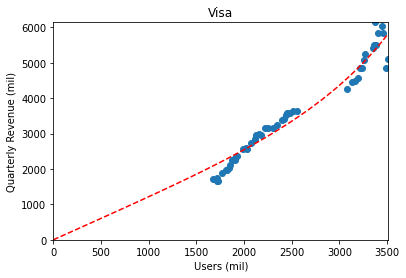

lambda:  1.2092214534635166
sigma:  2.909801859217004e-06
kappa:  -2.151496495449879e-06


In [31]:
import matplotlib.pyplot as plt

def print_params(beta):
    print('lambda: ', beta[0])
    print('sigma: ', beta[1])
    print('kappa: ', beta[2])

def data_model_plot(company_name, params):
    users = company_data[company_name]['users_mil']
    quarterly_rev = company_data[company_name]['quarterly_revenue_mil']

    # plot datapoints
    plt.scatter(x=users, y=quarterly_rev)
    plt.xlim(0, users.max())
    plt.ylim(0, quarterly_rev.max())
    plt.title(company_name)
    plt.xlabel('Users (mil)')
    plt.ylabel('Quarterly Revenue (mil)')

    # plot USL w/ params from regression
    usl_x = np.linspace(0, max(users), num=100)
    usl_y = usl(usl_x, params[0], params[1], params[2])
    plt.plot(usl_x, usl_y, 'r--')
    plt.show()
    
    print_params(params)
    
data_model_plot('Visa', c)

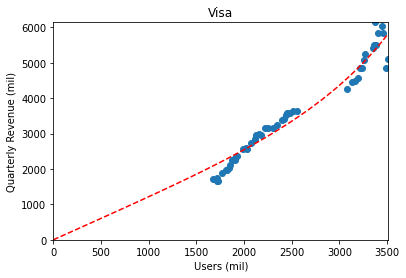

lambda:  1.2092214534635166
sigma:  2.909801859217004e-06
kappa:  -2.151496495449879e-06


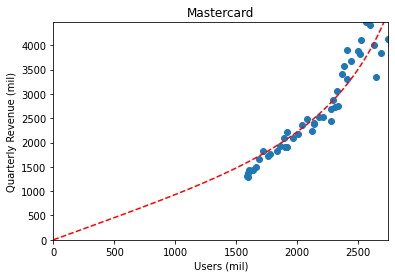

lambda:  0.9095098509396338
sigma:  1.7972943872325876e-05
kappa:  -1.2472000179047977e-06


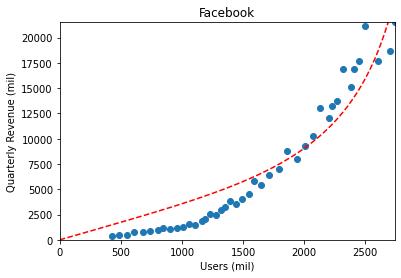

lambda:  3.466109665978942
sigma:  5.095176727740232e-06
kappa:  -5.740469936960378e-06


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


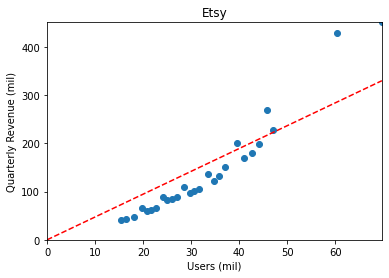

lambda:  4.734119936460162
sigma:  4e-08
kappa:  -1.68e-08


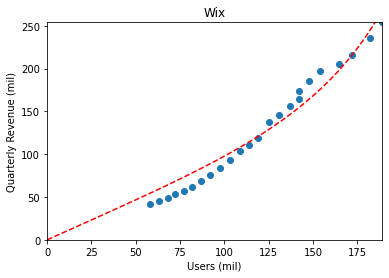

lambda:  0.9279787381452731
sigma:  0.473895813643348
kappa:  -1.0899295686771057e-07


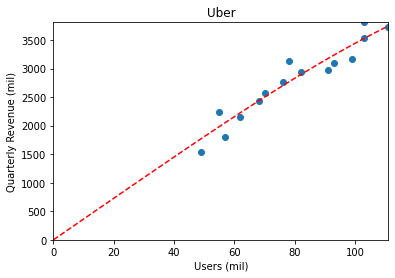

lambda:  36.41026148635013
sigma:  1.0935033299113417e-06
kappa:  0.053657512066033516


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


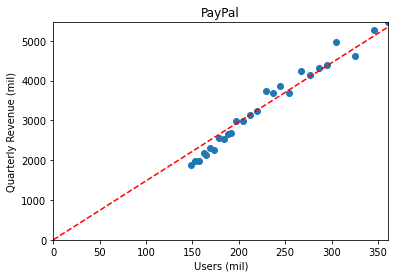

lambda:  14.809815389329897
sigma:  3.51e-09
kappa:  5.67e-09


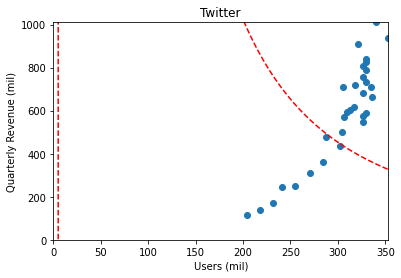

lambda:  -341212.37860348355
sigma:  -0.13321822839067465
kappa:  0.06320324851160988


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


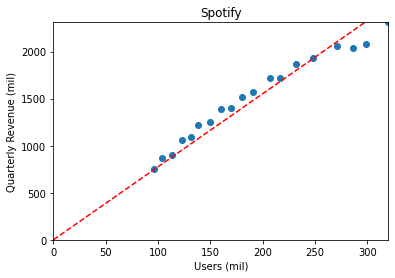

lambda:  7.760752633138771
sigma:  5.22e-10
kappa:  8.64e-09


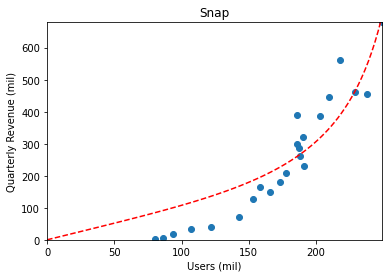

lambda:  1.0333757037483857
sigma:  -0.00021918196418700187
kappa:  0.00018778191446159603


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


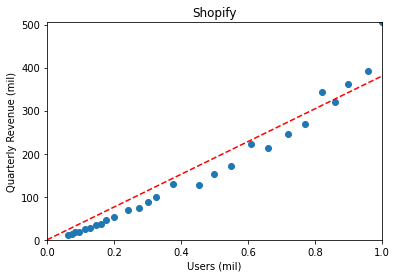

lambda:  380.2671637228847
sigma:  1.3e-05
kappa:  0.000374


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


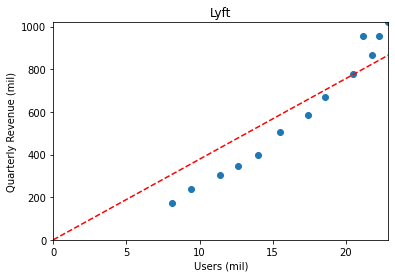

lambda:  37.80909997439395
sigma:  3.85e-08
kappa:  -3.78e-08


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


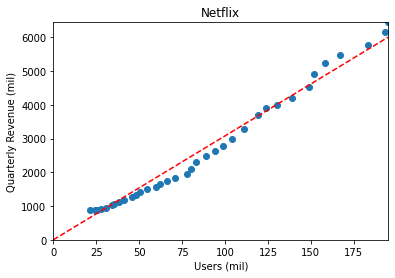

lambda:  30.777189934978267
sigma:  1.59e-08
kappa:  -1.07e-08


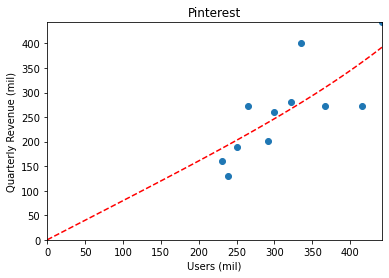

lambda:  0.7958977829677044
sigma:  6.644751311305434e-09
kappa:  -0.1808731385533255


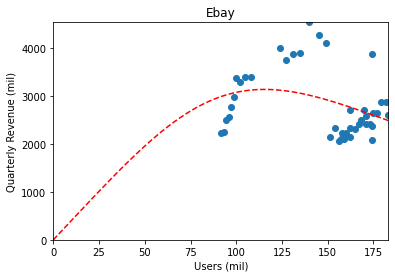

lambda:  40.60162480748515
sigma:  0.0003466739884289221
kappa:  0.0009466047338164515


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


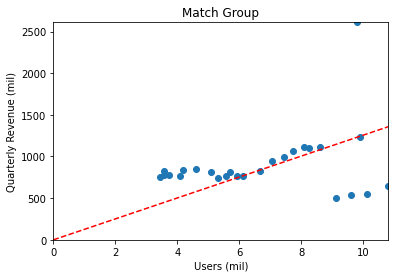

lambda:  125.68608882245026
sigma:  2.09e-07
kappa:  6.94e-06


/home/kam/Documents/school/eecs_738/uciml_dataset_analysis/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


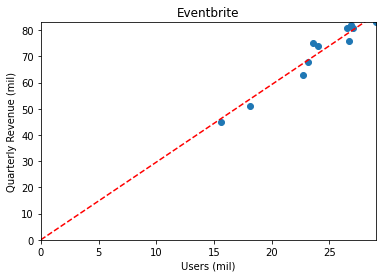

lambda:  2.9632845216847556
sigma:  3.85e-08
kappa:  -1.43e-08


In [45]:
table = pd.DataFrame(np.zeros((len(companies), 3)))
table.index = companies
table.columns = ['lambda', 'sigma', 'kappa']

for company in companies:
    initial_lmda  = list(company_data[company]['revenue_per_user'])[0]
    initial_sigma = list(company_data[company]['gross_margin_density'])[0]
    initial_kappa = list(company_data[company]['gmd_coef'])[0]
    initial_param_values = [initial_lmda, initial_sigma, initial_kappa]

    users = company_data[company]['users_mil'].values
    rev   = company_data[company]['quarterly_revenue_mil'].values
    
    params, cov = curve_fit(usl, users, rev, initial_param_values)
    table.loc[company]['lambda'], table.loc[company]['sigma'], table.loc[company]['kappa'] = params[0], params[1], params[2]
    
    data_model_plot(company, params)

In [48]:
table.to_clipboard()